

#                  Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> What can we say about the importance of Cinema's Industry? and its effect on the economy of the producing countries ? What can we say about the social effect on people and the fun we have while watching a movie.
> I am interested in watching movies , it's one of my pleasuring fun and I've watched more than 500 movies , so I consider myself familiar with this industry.
> Here we have a dataset to investigate "TMDb Movie Database" a dataset of about 5000 movies, here we can answer questions as;<br />
<br />
> **1. What rate of movie production over years for each movie genre?<br/>
> 2. which are the highest profitable, rated, vote_count, popular movie genre?<br/>
> 3. Top 10 Movies?:<br/>
>..3A. What kinds of properties are associated with movies that have high revenues?<br />
>..3B. What kinds of properties are associated with the most popular movies?<br/>
>..3C. What kinds of properties are associated with the highest rated movies?<br/> 
> 4. Which companies made the overall highest revenue per year?<br />
> 5. What is the relation between popularity and vote_count?<br />
> 6. What is the relation between the vote_count and vote rate?<br />
> 7. Is there  a relation between the budget and the runtime ?<br/>
> 8. Is there  a relation between the budget and the revenue ?<br/>
> 9. Most Popular Directors?<br/>
> 10. Average Runtime?
**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os as os
import re
import json
import datetime as dt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
credits_df = pd.read_csv('tmdb_5000_credits.csv')
movies_df = pd.read_csv('tmdb_5000_movies.csv')


In [3]:
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


**We need to change the column id to movie_id to prevent duplication while merging**

In [5]:
# changing the movies_df column name 'id' to 'movie_id'
movies_df_changed = movies_df.rename(columns = {'id':'movie_id'})
movies_df_changed.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [6]:
# merging the two csv data file into one file dataset
movies_credit = pd.merge(credits_df, movies_df_changed, on=['title', 'movie_id'], how='outer')
movies_credit.head()

,movie_id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,...,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,...,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,...,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,...,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


**1. We need to save these changes into a csv file.**
**2. We need to take a copy.**

In [7]:
# 1.Saving the merged two file to a one csv file
movies_credit.to_csv('movies_credit.csv')

In [8]:
# 2.Taking a copy of the file for cleaning the data 
movies_clean = movies_credit.copy()

In [9]:
movies_clean.shape

(4803, 22)

In [10]:
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              4803 non-null   int64  
 1   title                 4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4800 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue              

In [11]:
movies_clean.describe()

,movie_id,budget,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [12]:
movies_clean.duplicated().sum()

0

array([[<AxesSubplot:title={'center':'movie_id'}>,
        <AxesSubplot:title={'center':'budget'}>,
        <AxesSubplot:title={'center':'popularity'}>],
       [<AxesSubplot:title={'center':'revenue'}>,
        <AxesSubplot:title={'center':'runtime'}>,
        <AxesSubplot:title={'center':'vote_average'}>],
       [<AxesSubplot:title={'center':'vote_count'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

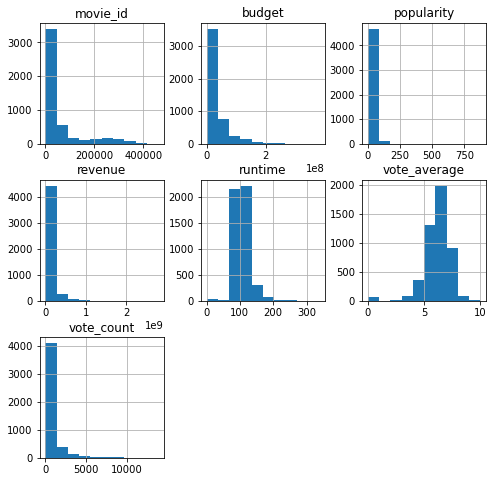

In [13]:
movies_clean.hist(figsize = (8,8))

### Data Cleaning (TMDb dataset cleaning):

> 1. We need to fill Nan cells in columns with numerical values with the mean value.
> 2. We need to remove the unused and unimportnat column like ('homepage')
> 3. We need to remove the NaN cells from dataset.
> 4. We need to convert the dtype of column ('runtime') values to integer dtype.
> 5. Capture the name of crew, cast, genres, keywords, spoken_languages, production_countries, production_companies.
> 6. We need to remove the unnecessary characters and strip spaces from these names.
> 7. Save all these changes to a new csv file.



**We need to fill Nan or zero values\' cells with the mean value of each column** 

In [ ]:
# fill Nan cells in columns with numerical values with the mean value.
movies_clean.budget = movies_clean.budget.replace(0,movies_clean.budget.mean())
movies_clean.popularity = movies_clean.popularity.replace('0', movies_clean.popularity.mean())
movies_clean.revenue = movies_clean.revenue.replace(0, movies_clean.revenue.mean())
movies_clean.runtime = movies_clean.runtime.replace('0', movies_clean.runtime.mean())
movies_clean.vote_average = movies_clean.vote_average.replace('0', movies_clean.vote_average.mean())
movies_clean.vote_count = movies_clean.vote_count.replace(0, movies_clean.vote_count.mean())

**We need to remove the unused and unimportnat column like ('homepage')**

In [15]:
# We need to remove the unused and unimportnat column like ('homepage')
movies_clean = movies_clean.drop('homepage', axis = 1)

**We need to remove the NaN cells from dataset**

In [16]:
# We need to remove the NaN cells from dataset
movies_clean.dropna(inplace=True)

In [17]:
# convert the dtype of column ('runtime') values to integer dtype
movies_clean.runtime = movies_clean.runtime.astype(int)

In [18]:
movies_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3959 entries, 0 to 4801
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   movie_id              3959 non-null   int64  
 1   title                 3959 non-null   object 
 2   cast                  3959 non-null   object 
 3   crew                  3959 non-null   object 
 4   budget                3959 non-null   float64
 5   genres                3959 non-null   object 
 6   keywords              3959 non-null   object 
 7   original_language     3959 non-null   object 
 8   original_title        3959 non-null   object 
 9   overview              3959 non-null   object 
 10  popularity            3959 non-null   float64
 11  production_companies  3959 non-null   object 
 12  production_countries  3959 non-null   object 
 13  release_date          3959 non-null   object 
 14  revenue               3959 non-null   float64
 15  runtime              

In [19]:
movies_clean.shape

(3959, 21)

**Convert strings in columns to JSON structure to iterate over them and capture name value.<br/>
Capture the name of crew, cast, genres, keywords, spoken_languages, production_countries, production_companies.<br/>
Remove the unnecessary characters and strip spaces from these names.**

In [20]:
# collect columns needed to be converted to json into one array
# use a for loop to iterate over the array of columns to convert them
json_columns = ['genres', 'cast', 'crew', 'keywords', 'production_companies', 'production_countries', 'spoken_languages'] 
for column in json_columns:
    movies_clean[column] = movies_clean[column].apply(json.loads)

**code a function to iterate over the contents of the crew column to capture the director name**

In [21]:
# code a function to iterate over the contents of the crew column to capture the director name
# use apply method to apply the function to the wanted column
def get_director(column):
    for i in column:
        if i['job'] == 'Director':
            return i['name']
    return np.nan
movies_clean['director'] = movies_clean['crew'].apply(get_director)
movies_clean.head()

,movie_id,title,cast,crew,budget,genres,keywords,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,director
0,19995,Avatar,"[{'cast_id': 242, 'character': 'Jake Sully', '...","[{'credit_id': '52fe48009251416c750aca23', 'de...",237000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 1463, 'name': 'culture clash'}, {'id':...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2.787965e+09,162,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,7.2,11800.0,James Cameron
1,285,Pirates of the Caribbean: At World's End,"[{'cast_id': 4, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",300000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...","[{'id': 270, 'name': 'ocean'}, {'id': 726, 'na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2007-05-19,9.610000e+08,169,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"At the end of the world, the adventure begins.",6.9,4500.0,Gore Verbinski
2,206647,Spectre,"[{'cast_id': 1, 'character': 'James Bond', 'cr...","[{'credit_id': '54805967c3a36829b5002c41', 'de...",245000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 470, 'name': 'spy'}, {'id': 818, 'name...",en,Spectre,A cryptic message from Bond’s past sends him o...,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2015-10-26,8.806746e+08,148,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,A Plan No One Escapes,6.3,4466.0,Sam Mendes
3,49026,The Dark Knight Rises,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",250000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...","[{'id': 849, 'name': 'dc comics'}, {'id': 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-07-16,1.084939e+09,165,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Legend Ends,7.6,9106.0,Christopher Nolan
4,49529,John Carter,"[{'cast_id': 5, 'character': 'John Carter', 'c...","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",260000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...","[{'id': 818, 'name': 'based on novel'}, {'id':...",en,John Carter,"John Carter is a war-weary, former military ca...",...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2012-03-07,2.841391e+08,132,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"Lost in our world, found in another.",6.1,2124.0,Andrew Stanton


**iterate over the columns and clean them from the unwanted charcters and spaces**

In [22]:
# iterate over the columns and clean them from the unwanted charcters and spaces 
for column in json_columns:
    for index, i in zip(movies_clean.index, movies_clean[column]):
        list_names = []
        for j in range(len(i)):
            list_names.append(i[j]['name'])
            if len(list_names) >= 4:
                break;
        movies_clean.loc[index, column] = str(list_names)
    movies_clean[column] = movies_clean[column].str.strip('[]').str.replace('\'', "").str.replace(',', ' |')   

In [23]:
movies_clean.head()

,movie_id,title,cast,crew,budget,genres,keywords,original_language,original_title,overview,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,director
0,19995,Avatar,Sam Worthington | Zoe Saldana | Sigourney Weav...,Stephen E. Rivkin | Rick Carter | Christopher ...,237000000.0,Action | Adventure | Fantasy | Science Fiction,culture clash | future | space war | space colony,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,United States of America | United Kingdom,2009-12-10,2.787965e+09,162,English | Español,Released,Enter the World of Pandora.,7.2,11800.0,James Cameron
1,285,Pirates of the Caribbean: At World's End,Johnny Depp | Orlando Bloom | Keira Knightley ...,Dariusz Wolski | Gore Verbinski | Jerry Bruckh...,300000000.0,Adventure | Fantasy | Action,ocean | drug abuse | exotic island | east indi...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",...,United States of America,2007-05-19,9.610000e+08,169,English,Released,"At the end of the world, the adventure begins.",6.9,4500.0,Gore Verbinski
2,206647,Spectre,Daniel Craig | Christoph Waltz | Léa Seydoux |...,Thomas Newman | Sam Mendes | Anna Pinnock | Jo...,245000000.0,Action | Adventure | Crime,spy | based on novel | secret agent | sequel,en,Spectre,A cryptic message from Bond’s past sends him o...,...,United Kingdom | United States of America,2015-10-26,8.806746e+08,148,Français | English | Español | Italiano,Released,A Plan No One Escapes,6.3,4466.0,Sam Mendes
3,49026,The Dark Knight Rises,Christian Bale | Michael Caine | Gary Oldman |...,Hans Zimmer | Charles Roven | Christopher Nola...,250000000.0,Action | Crime | Drama | Thriller,dc comics | crime fighter | terrorist | secret...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,...,United States of America,2012-07-16,1.084939e+09,165,English,Released,The Legend Ends,7.6,9106.0,Christopher Nolan
4,49529,John Carter,Taylor Kitsch | Lynn Collins | Samantha Morton...,Andrew Stanton | Andrew Stanton | John Lassete...,260000000.0,Action | Adventure | Science Fiction,based on novel | mars | medallion | space travel,en,John Carter,"John Carter is a war-weary, former military ca...",...,United States of America,2012-03-07,2.841391e+08,132,English,Released,"Lost in our world, found in another.",6.1,2124.0,Andrew Stanton


**Save Changes to the CSV file we saved to it before**

In [ ]:
# save to csv file
movies_clean.to_csv('movies.csv')

<a id='eda'></a>
## Exploratory Data Analysis

**Extract the year from column( release_date) using str.extract method**

In [25]:
# Extract the year from column( release_date) using str.extract method and regular expression
movies_clean['year'] = movies_clean.release_date.str.extract('(\d{4})')

In [26]:
movies_clean.to_csv('movies.csv')

In [27]:
sns.set_style('darkgrid')

### Q1:What rate of movie production over years for each movie genre?

_**Get the Rate of Drama Movies**_

Text(0.5, 1.0, 'Drama Over Years')

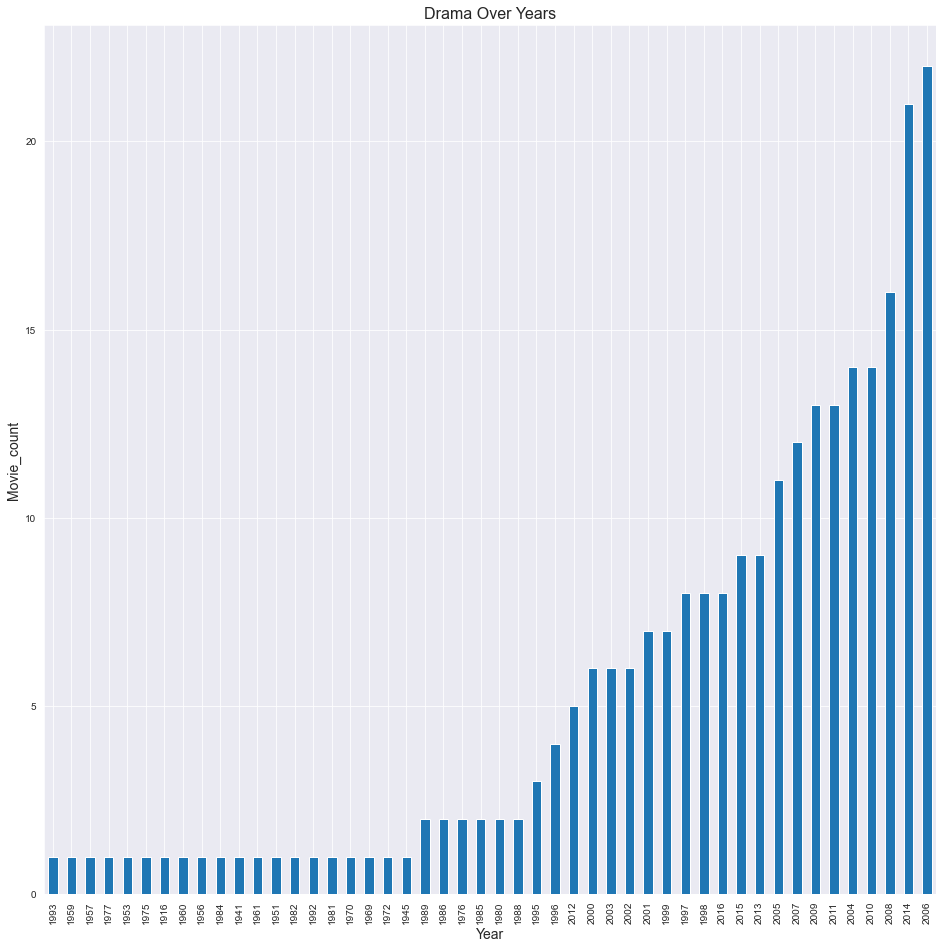

In [28]:
# Drama Movies
drama = movies_clean.query('genres == "Drama"')['year'].value_counts(ascending=True)
drama.plot(kind = 'bar',figsize=(16,16))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Drama Over Years', fontsize=16)

_**Get the Rate of Comedy Movies**_

Text(0.5, 1.0, 'Comedy Over Years')

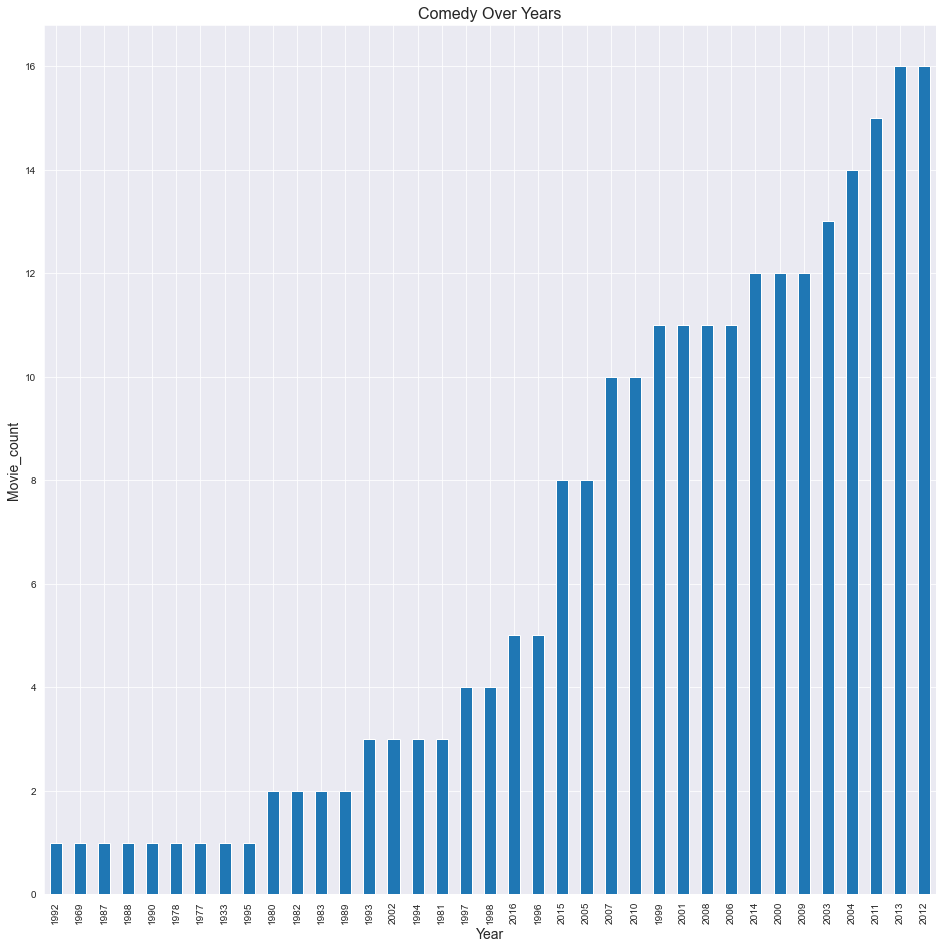

In [29]:
# Comedy Movies
comedy = movies_clean.query('genres == "Comedy"')['year'].value_counts(ascending=True)
comedy.plot(kind = 'bar',figsize=(16,16))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Comedy Over Years', fontsize=16)

_**Get the Rate of Romance Movies**_

Text(0.5, 1.0, 'Romance Over Years')

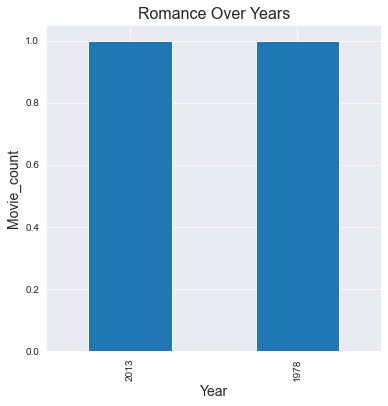

In [30]:
# Romance Movies
romance = movies_clean.query('genres == "Romance"')['year'].value_counts()
romance.plot(kind = 'bar',figsize=(6,6))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Romance Over Years', fontsize=16)

_**Get the Rate of Adventure Movies**_

Text(0.5, 1.0, 'Adventure Over Years')

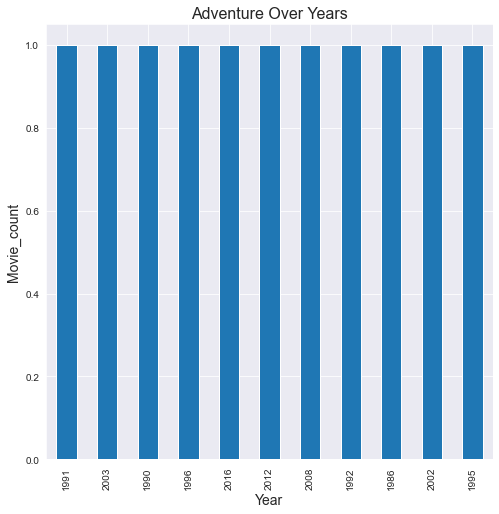

In [31]:
# Adventure Movies
adventure = movies_clean.query('genres == "Adventure"')['year'].value_counts()
adventure.plot(kind = 'bar',figsize=(8,8))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Adventure Over Years', fontsize=16)

_**Get the Rate of Horror Movies**_

Text(0.5, 1.0, 'Horror Over Years')

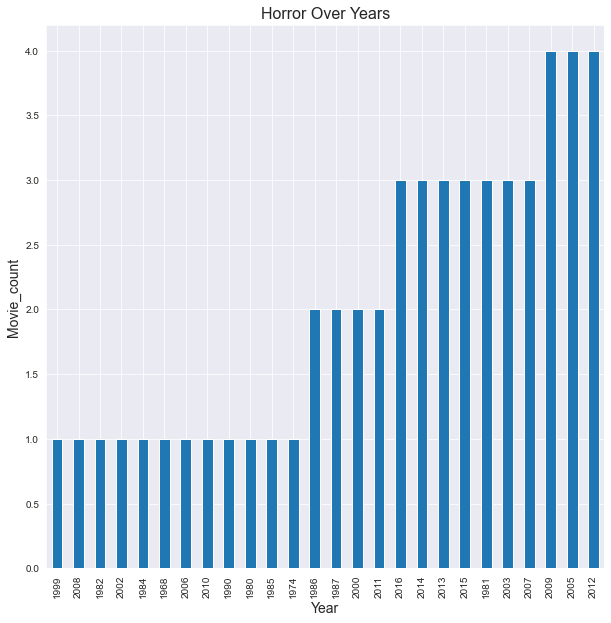

In [32]:
# Horror Movies
horror = movies_clean.query('genres == "Horror"')['year'].value_counts(ascending=True)
horror.plot(kind = 'bar',figsize=(10,10))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Horror Over Years', fontsize=16)

_**Get the Rate of Crime Movies**_

Text(0.5, 1.0, 'Crime Over Years')

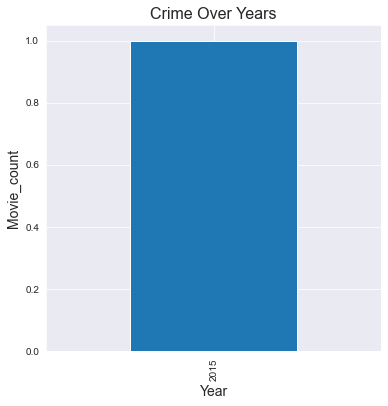

In [33]:
# Crime Movies
crime = movies_clean.query('genres == "Crime"')['year'].value_counts()
crime.plot(kind = 'bar',figsize=(6,6))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Crime Over Years', fontsize=16)

_**Get the Rate of Thriller Movies**_

Text(0.5, 1.0, 'Thriller Over Years')

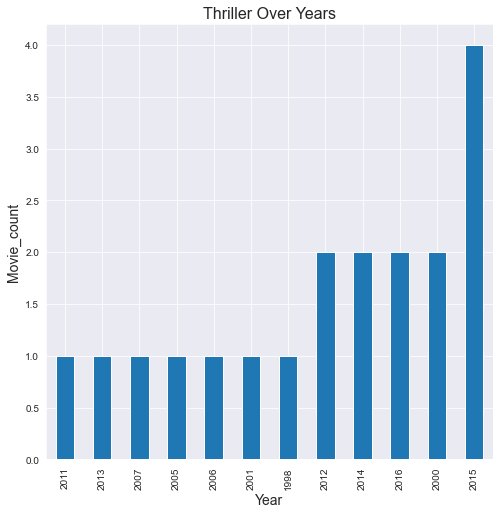

In [34]:
# Thriller Movies
thriller = movies_clean.query('genres == "Thriller"')['year'].value_counts(ascending=True)
thriller.plot(kind = 'bar',figsize=(8,8))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Thriller Over Years', fontsize=16)

_**Get the Rate of Family Movies**_

Text(0.5, 1.0, 'Family Over Years')

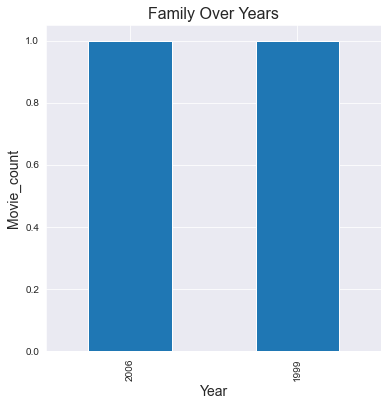

In [35]:
#Family Movies
family = movies_clean.query('genres == "Family"')['year'].value_counts()
family.plot(kind = 'bar',figsize=(6,6))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Family Over Years', fontsize=16)

_**Get the Rate of Music Movies**_

Text(0.5, 1.0, 'Music Movies Over Years')

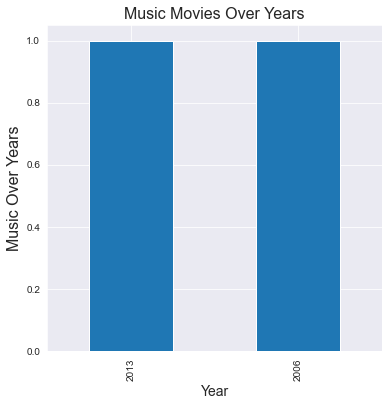

In [36]:
# Music Movies
music = movies_clean.query('genres == "Music"')['year'].value_counts()
music.plot(kind = 'bar',figsize=(6,6))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Music Over Years', fontsize=16)
plt.title('Music Movies Over Years', fontsize=16)

_**Get the Rate of Animation Movies**_

Text(0.5, 1.0, 'Animation Over Years')

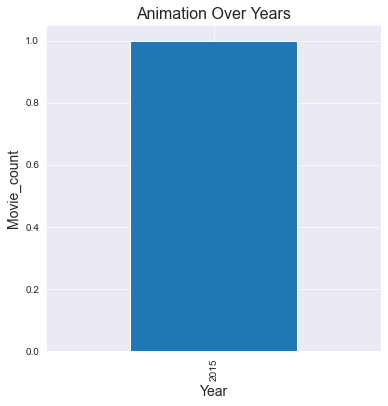

In [37]:
# Animation Movies
animation = movies_clean.query('genres == "Animation"')['year'].value_counts()
animation.plot(kind = 'bar',figsize=(6,6))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Animation Over Years', fontsize=16)

_**Get the Rate of Action Movies**_

Text(0.5, 1.0, 'Action Over Years')

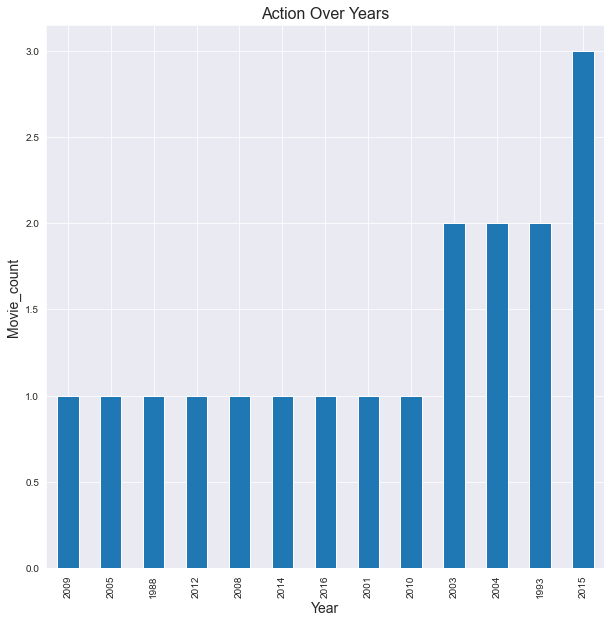

In [38]:
# Action Movies
action = movies_clean.query('genres == "Action"')['year'].value_counts(ascending=True)
action.plot(kind = 'bar',figsize=(10,10))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Action Over Years', fontsize=16)

_**Get the Rate of Fantasy Movies**_

Text(0.5, 1.0, 'Fantasy Over Years')

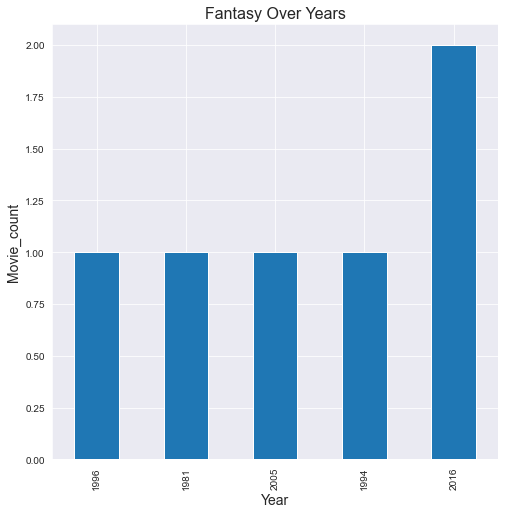

In [39]:
# Fantasy Movies
fantasy = movies_clean.query('genres == "Fantasy"')['year'].value_counts(ascending=True)
fantasy.plot(kind = 'bar',figsize=(8,8))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Fantasy Over Years', fontsize=16)

_**Get the Rate of Western Movies**_

Text(0.5, 1.0, 'Western Over Years')

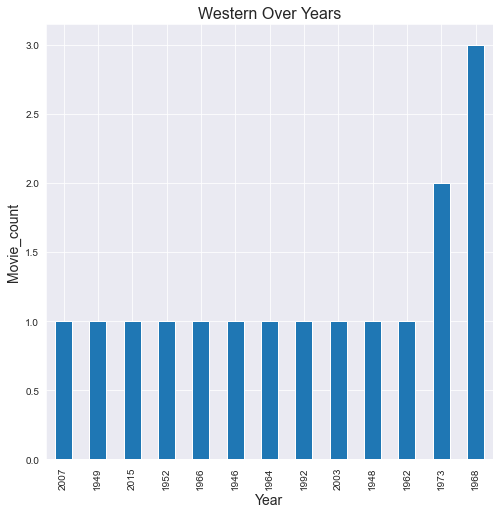

In [40]:
# Western Movies
western = movies_clean.query('genres == "Western"')['year'].value_counts(ascending=True)
western.plot(kind = 'bar',figsize=(8,8))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Western Over Years', fontsize=16)

_**Get the Rate of Science Fiction Movies**_

Text(0.5, 1.0, 'Science Fiction Over Years')

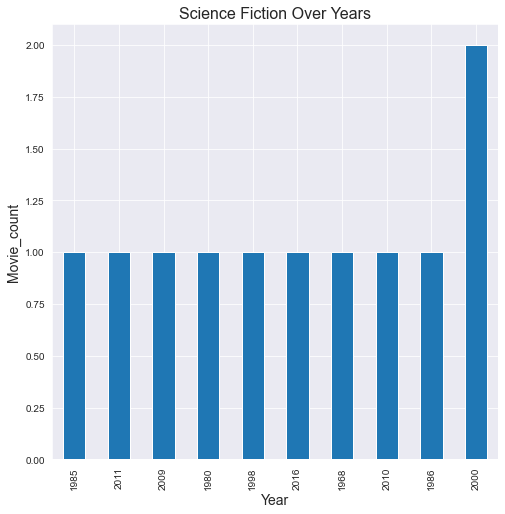

In [41]:
# Science Fiction Movies
scinece_fiction = movies_clean.query('genres == "Science Fiction"')['year'].value_counts(ascending=True)
scinece_fiction.plot(kind = 'bar',figsize=(8,8))
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Movie_count', fontsize= 14)
plt.title('Science Fiction Over Years', fontsize=16)

### Q2: Which genres are most popular, profitable, high rated, high vote count from year to year?

_**Getting the Profit Values and appending them into a column "Profit"**_<br/>
_**Save the column into the CSV file**_

In [42]:
# getting the profit and appending it into profit column
movies_clean['profit'] = movies_clean.revenue - movies_clean.budget
movies_clean.head()
movies_clean.to_csv('movies.csv')

_**function to get data and concatenating it to one of the dataset properties classification**_<br/>
_**Here we need to split movie genres and connecting each genre with its related data**_

In [43]:
# function to get data and concatenating it to one of the dataset properties classification
# Here we need to split movie genres and connecting each genre with its related data
def get_data(data, column):
    data = data[column].str.cat(sep = '|')
    data = pd.Series(data.split('|')).str.strip()
    data_counts = data.value_counts(ascending=True)
    return data_counts

_**getting the highest profit data and connecting them to its related movie genre**_

Text(0.5, 1.0, 'Most Profitable Movie Genres')

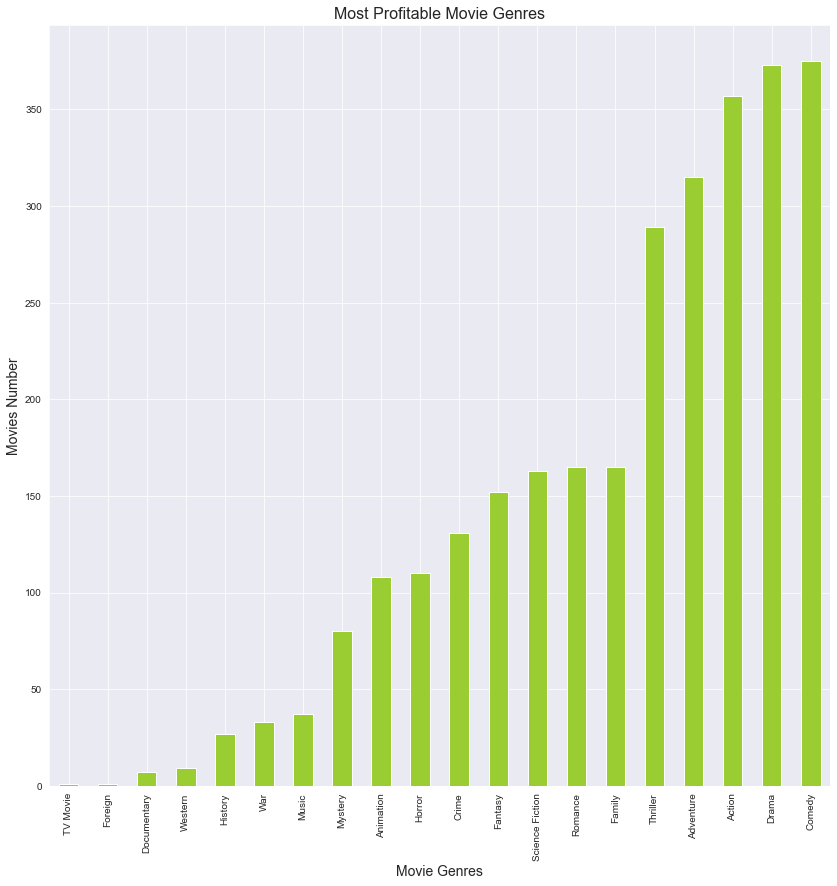

In [44]:
# getting the highest profit data and connecting them to its related movie genre
highest_profit = movies_clean[movies_clean.profit > movies_clean.profit.mean()]
movie_genre = get_data(highest_profit,'genres')
movie_genre.plot(kind='bar', figsize=(14,14), color='yellowgreen')
plt.xlabel('Movie Genres', fontsize=14)
plt.ylabel('Movies Number', fontsize=14)
plt.title('Most Profitable Movie Genres', fontsize=16)

_**getting the highest vote_average data and connecting them to its related movie genre**_

Text(0.5, 1.0, 'Movies with Highest Vote Average')

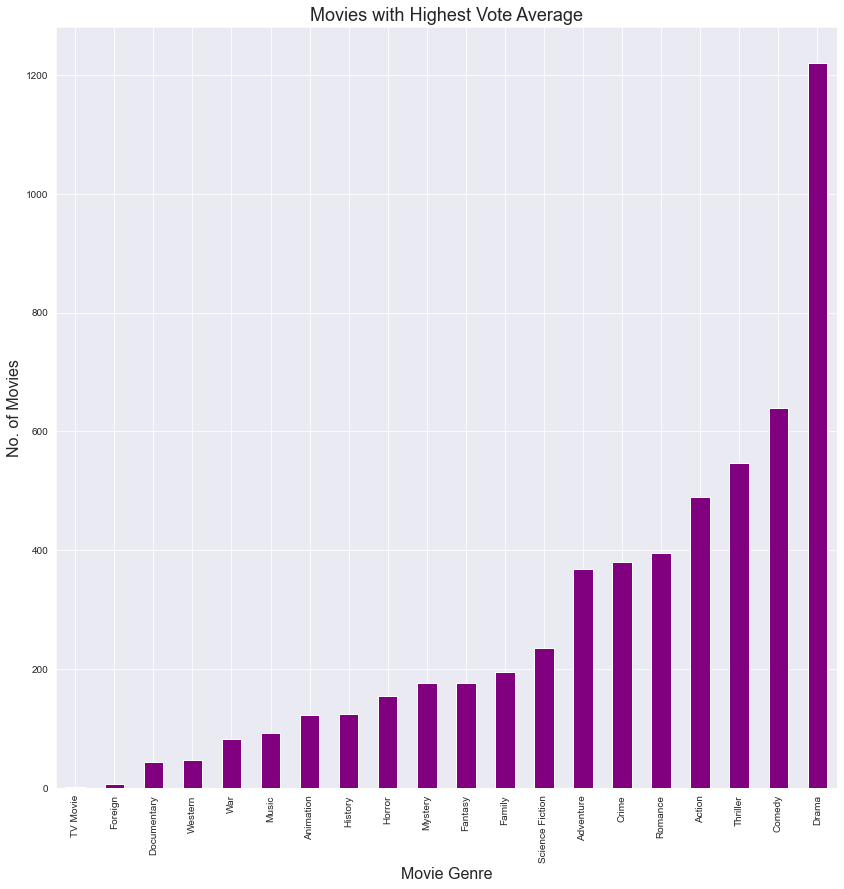

In [45]:
# getting the highest vote_average data and connecting them to its related movie genre
highest_vote_average = movies_clean[movies_clean.vote_average > movies_clean.vote_average.mean()]
movie_genre = get_data(highest_vote_average,'genres')
movie_genre.plot(kind='bar', figsize=(14,14), color='purple')
plt.xlabel('Movie Genre', fontsize=16)
plt.ylabel('No. of Movies', fontsize=16)
plt.title('Movies with Highest Vote Average', fontsize=18)

_**getting the highest vote_count data and connecting them to its related movie genre**_

Text(0.5, 1.0, 'Movies with Highest Vote Count')

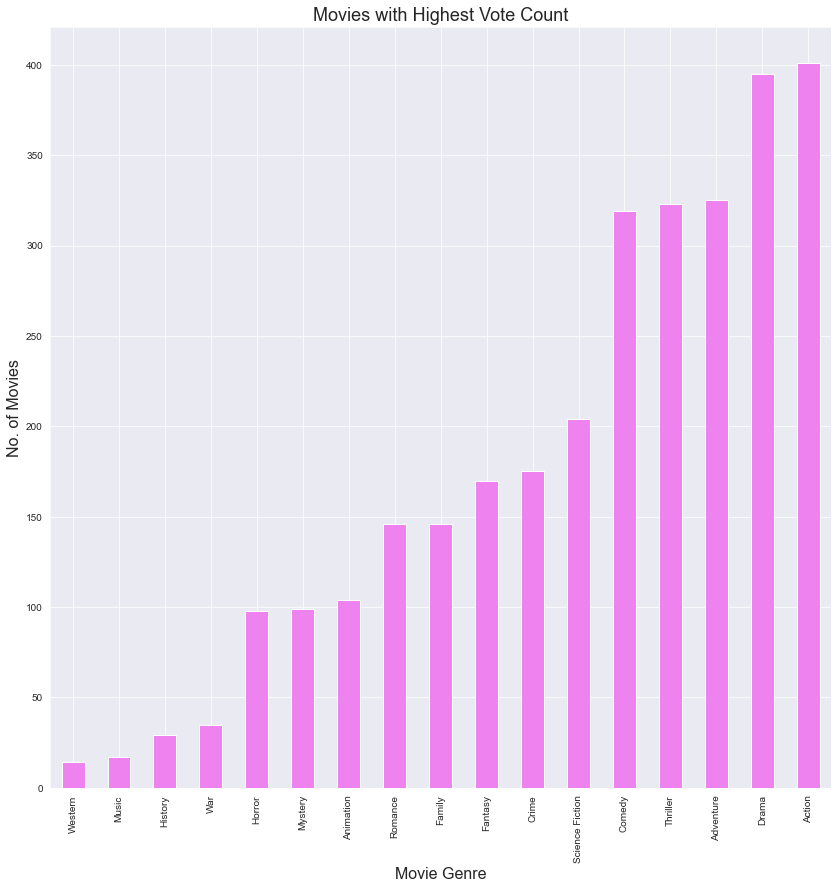

In [46]:
# getting the highest vote_count data and connecting them to its related movie genre
highest_vote_count = movies_clean[movies_clean.vote_count > movies_clean.vote_count.mean()]
movie_genre = get_data(highest_vote_count,'genres')
movie_genre.plot(kind='bar', figsize=(14,14), color='violet')
plt.xlabel('Movie Genre', fontsize=16)
plt.ylabel('No. of Movies', fontsize=16)
plt.title('Movies with Highest Vote Count', fontsize=18)

_**getting the highest popularity data and connecting them to its related movie genre**_

Text(0.5, 1.0, 'Movies with Highest Popularity')

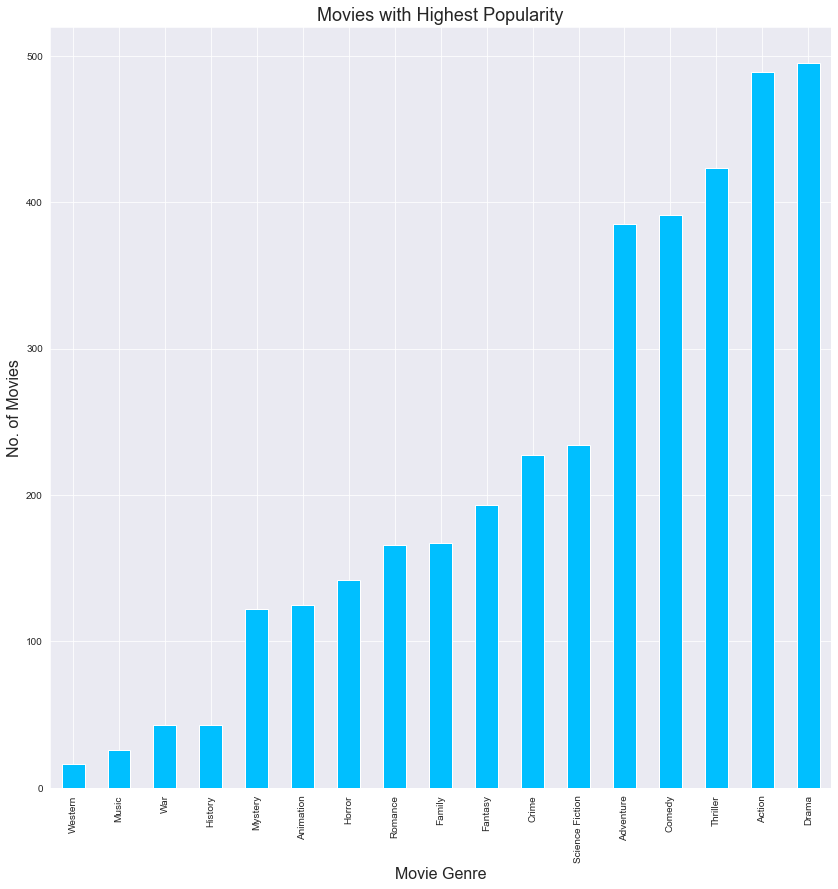

In [47]:
# getting the highest popularity data and connecting them to its related movie genre
highest_popularity = movies_clean[movies_clean.popularity > movies_clean.popularity.mean()]
movie_genre = get_data(highest_popularity,'genres')
movie_genre.plot(kind='bar', figsize=(14,14), color='#00BFFF')
plt.xlabel('Movie Genre', fontsize=16)
plt.ylabel('No. of Movies', fontsize=16)
plt.title('Movies with Highest Popularity', fontsize=18)

## TOP 10 Movies
### Q3A: What kinds of properties are associated with movies that have high revenues?

_**getting the Top 10 highest revenue movies and their properties**_

In [48]:
# getting the Top 10 highest revenue movies and their properties
top_10 = movies_clean['revenue'].nlargest(10).index
movies_clean.loc[top_10]

,movie_id,title,cast,crew,budget,genres,keywords,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,director,year,profit
0,19995,Avatar,Sam Worthington | Zoe Saldana | Sigourney Weav...,Stephen E. Rivkin | Rick Carter | Christopher ...,237000000.0,Action | Adventure | Fantasy | Science Fiction,culture clash | future | space war | space colony,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",...,2.787965e+09,162,English | Español,Released,Enter the World of Pandora.,7.2,11800.0,James Cameron,2009,2.550965e+09
25,597,Titanic,Kate Winslet | Leonardo DiCaprio | Frances Fis...,Mali Finn | James Horner | James Cameron | Jam...,200000000.0,Drama | Romance | Thriller,shipwreck | iceberg | ship | panic,en,Titanic,"84 years later, a 101-year-old woman named Ros...",...,1.845034e+09,194,English | Français | Deutsch | svenska,Released,Nothing on Earth could come between them.,7.5,7562.0,James Cameron,1997,1.645034e+09
16,24428,The Avengers,Robert Downey Jr. | Chris Evans | Mark Ruffalo...,Alan Silvestri | Christopher Boyes | Christoph...,220000000.0,Science Fiction | Action | Adventure,new york | shield | marvel comic | superhero,en,The Avengers,When an unexpected enemy emerges and threatens...,...,1.519558e+09,143,English,Released,Some assembly required.,7.4,11776.0,Joss Whedon,2012,1.299558e+09
28,135397,Jurassic World,Chris Pratt | Bryce Dallas Howard | Irrfan Kha...,Steven Spielberg | John Papsidera | Frank Mars...,150000000.0,Action | Adventure | Science Fiction | Thriller,monster | dna | tyrannosaurus rex | velociraptor,en,Jurassic World,Twenty-two years after the events of Jurassic ...,...,1.513529e+09,124,English,Released,The park is open.,6.5,8662.0,Colin Trevorrow,2015,1.363529e+09
44,168259,Furious 7,Vin Diesel | Paul Walker | Dwayne Johnson | Mi...,James Wan | Sanja Milkovic Hays | Peter Brown ...,190000000.0,Action,car race | speed | revenge | suspense,en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,...,1.506249e+09,137,English,Released,Vengeance Hits Home,7.3,4176.0,James Wan,2015,1.316249e+09
7,99861,Avengers: Age of Ultron,Robert Downey Jr. | Chris Hemsworth | Mark Ruf...,Danny Elfman | Christopher Boyes | Christopher...,280000000.0,Action | Adventure | Science Fiction,marvel comic | sequel | superhero | based on c...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,...,1.405404e+09,141,English,Released,A New Age Has Come.,7.3,6767.0,Joss Whedon,2015,1.125404e+09
124,109445,Frozen,Kristen Bell | Idina Menzel | Jonathan Groff |...,John Lasseter | Christophe Beck | Chris Buck |...,150000000.0,Animation | Adventure | Family,queen | musical | princess | betrayal,en,Frozen,Young princess Anna of Arendelle dreams about ...,...,1.274219e+09,102,English,Released,Only the act of true love will thaw a frozen h...,7.3,5295.0,Chris Buck,2013,1.124219e+09
31,68721,Iron Man 3,Robert Downey Jr. | Gwyneth Paltrow | Don Chea...,Shane Black | Shane Black | John Toll | Louise...,200000000.0,Action | Adventure | Science Fiction,terrorist | war on terror | tennessee | malibu,en,Iron Man 3,When Tony Stark's world is torn apart by a for...,...,1.215440e+09,130,English,Released,Unleash the power behind the armor.,6.8,8806.0,Shane Black,2013,1.015440e+09
546,211672,Minions,Sandra Bullock | Jon Hamm | Michael Keaton | A...,Christopher Meledandri | Kyle Balda | Ken Daur...,74000000.0,Family | Animation | Adventure | Comedy,assistant | aftercreditsstinger | duringcredit...,en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",...,1.156731e+09,91,English,Released,"Before Gru, they had a history of bad bosses",6.4,4571.0,Kyle Balda,2015,1.082731e+09
26,271110,Captain America: Civil War,Chris Evans | Robert Downey Jr. | Scarlett Joh...,Ronald R. Reiss | Tom Johnson | Sarah Finn | C...,250000000.0,Adventure | Action | Science Fiction,civil war | war | marvel comic | sequel,en,Captain America: Civil War,"Following the events 

### Q3B: What kinds of properties are associated with the most popular movies?

_**getting the Top 10 highest revenue movies and their properties**_

In [49]:
# getting the Top 10 highest revenue movies and their properties
top_10 = movies_clean['popularity'].nlargest(10).index
movies_clean.loc[top_10]

,movie_id,title,cast,crew,budget,genres,keywords,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,director,year,profit
546,211672,Minions,Sandra Bullock | Jon Hamm | Michael Keaton | A...,Christopher Meledandri | Kyle Balda | Ken Daur...,74000000.0,Family | Animation | Adventure | Comedy,assistant | aftercreditsstinger | duringcredit...,en,Minions,"Minions Stuart, Kevin and Bob are recruited by...",...,1.156731e+09,91,English,Released,"Before Gru, they had a history of bad bosses",6.4,4571.0,Kyle Balda,2015,1.082731e+09
95,157336,Interstellar,Matthew McConaughey | Jessica Chastain | Anne ...,Hans Zimmer | Christopher Nolan | Christopher ...,165000000.0,Adventure | Drama | Science Fiction,saving the world | artificial intelligence | f...,en,Interstellar,Interstellar chronicles the adventures of a gr...,...,6.751200e+08,169,English,Released,Mankind was born on Earth. It was never meant ...,8.1,10867.0,Christopher Nolan,2014,5.101200e+08
788,293660,Deadpool,Ryan Reynolds | Morena Baccarin | Ed Skrein | ...,Ronna Kress | Sala Baker | Lauren Shuler Donne...,58000000.0,Action | Adventure | Comedy,anti hero | mercenary | marvel comic | superhero,en,Deadpool,Deadpool tells the origin story of former Spec...,...,7.831130e+08,108,English,Released,Witness the beginning of a happy ending,7.4,10995.0,Tim Miller,2016,7.251130e+08
94,118340,Guardians of the Galaxy,Chris Pratt | Zoe Saldana | Dave Bautista | Vi...,Craig Wood | Christopher Boyes | Christopher B...,170000000.0,Action | Science Fiction | Adventure,marvel comic | spaceship | space | outer space,en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",...,7.733286e+08,121,English,Released,All heroes start somewhere.,7.9,9742.0,James Gunn,2014,6.033286e+08
127,76341,Mad Max: Fury Road,Tom Hardy | Charlize Theron | Nicholas Hoult |...,Iain Smith | Ronna Kress | Bruce Berman | John...,150000000.0,Action | Adventure | Science Fiction | Thriller,future | chase | post-apocalyptic | dystopia,en,Mad Max: Fury Road,An apocalyptic story set in the furthest reach...,...,3.788583e+08,120,English,Released,What a Lovely Day.,7.2,9427.0,George Miller,2015,2.288583e+08
28,135397,Jurassic World,Chris Pratt | Bryce Dallas Howard | Irrfan Kha...,Steven Spielberg | John Papsidera | Frank Mars...,150000000.0,Action | Adventure | Science Fiction | Thriller,monster | dna | tyrannosaurus rex | velociraptor,en,Jurassic World,Twenty-two years after the events of Jurassic ...,...,1.513529e+09,124,English,Released,The park is open.,6.5,8662.0,Colin Trevorrow,2015,1.363529e+09
199,22,Pirates of the Caribbean: The Curse of the Bla...,Johnny Depp | Geoffrey Rush | Orlando Bloom | ...,Arthur Schmidt | Dariusz Wolski | Klaus Badelt...,140000000.0,Adventure | Fantasy | Action,exotic island | blacksmith | east india tradin...,en,Pirates of the Caribbean: The Curse of the Bla...,"Jack Sparrow, a freewheeling 17th-century pira...",...,6.550112e+08,143,English,Released,Prepare to be blown out of the water.,7.5,6985.0,Gore Verbinski,2003,5.150112e+08
82,119450,Dawn of the Planet of the Apes,Andy Serkis | Jason Clarke | Gary Oldman | Ker...,Kevin Mangan | Debra Zane | Doug Jackson | Wil...,170000000.0,Science Fiction | Action | Drama | Thriller,leader | colony | post-apocalyptic | dystopia,en,Dawn of the Planet of the Apes,A group of scientists in San Francisco struggl...,...,7.106446e+08,130,English,Released,One last chance for peace.,7.3,4410.0,Matt Reeves,2014,5.406446e+08
200,131631,The Hunger Games: Mockingjay - Part 1,Jennifer Lawrence | Josh Hutcherson | Liam Hem...,Debra Zane | James Newton Howard | Philip Seym...,125000000.0,Science Fiction | Adventure | Thriller,resistance | post-apocalyptic | dystopia | war,en,The Hunger Games: Mockingjay - Part 1,Katniss Everdeen reluctantly becomes the symbo...,...,7.521002e+08,123,English,Released,Fire burns brighter in the darkness,6.6,5584.0,Francis Lawrence,2014,6.271002e+08
88,17

### Q3C: What kinds of properties are associated with the highest rated movies?

_**getting the Top 10 highest rated movies and their properties**_

In [50]:
# getting the Top 10 highest rated movies and their properties
top_10 = movies_clean['vote_average'].nlargest(10).index
movies_clean.loc[top_10]

,movie_id,title,cast,crew,budget,genres,keywords,original_language,original_title,overview,...,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count,director,year,profit
4045,78373,"Dancer, Texas Pop. 81",Breckin Meyer | Peter Facinelli | Eddie Mills ...,Tim McCanlies | Tim McCanlies,2.904504e+07,Comedy | Drama | Family,small town | texas,en,"Dancer, Texas Pop. 81","Four guys, best friends, have grown up togethe...",...,5.655920e+05,97,English,Released,in the middle of nowhere they had everything,10.0,1.0,Tim McCanlies,1998,-2.847945e+07
4247,361505,Me You and Five Bucks,,,1.000000e+00,Romance | Comedy | Drama,,en,Me You and Five Bucks,"A womanizing yet lovable loser, Charlie, a wai...",...,8.226064e+07,90,,Released,"A story about second, second chances",10.0,2.0,NaN,2015,8.226064e+07
2386,69848,One Man's Hero,Tom Berenger | Joaquim de Almeida | Daniela Ro...,Mary Jo Slater | Jaime Comas Gil | Héctor Rome...,2.904504e+07,Western | Action | Drama | History,war | army | battlefield | chivalry,en,One Man's Hero,One Man's Hero tells the little-known story of...,...,8.226064e+07,121,English,Released,One man's hero is another man's traitor.,9.3,2.0,Lance Hool,1999,5.321560e+07
1881,278,The Shawshank Redemption,Tim Robbins | Morgan Freeman | Bob Gunton | Cl...,Thomas Newman | Roger Deakins | Philip Ivey | ...,2.500000e+07,Drama | Crime,prison | corruption | police brutality | priso...,en,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,...,2.834147e+07,142,English,Released,Fear can hold you prisoner. Hope can set you f...,8.5,8205.0,Frank Darabont,1994,3.341469e+06
2796,43867,The Prisoner of Zenda,Ronald Colman | Madeleine Carroll | Raymond Ma...,John L. Balderston | Lyle R. Wheeler | Alfred ...,2.904504e+07,Adventure | Drama | Romance,kidnapping | coronation | villain | kingdom,en,The Prisoner of Zenda,An Englishman on a Ruritarian holiday must imp...,...,8.226064e+07,101,Español | English,Released,The most thrilling swordfight ever filmed...,8.4,11.0,John Cromwell,1937,5.321560e+07
3337,238,The Godfather,Marlon Brando | Al Pacino | James Caan | Richa...,Francis Ford Coppola | Francis Ford Coppola | ...,6.000000e+06,Drama | Crime,italy | love at first sight | loss of father |...,en,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",...,2.450664e+08,175,English | Italiano | Latin,Released,An offer you can't refuse.,8.4,5893.0,Francis Ford Coppola,1972,2.390664e+08
662,550,Fight Club,Edward Norton | Brad Pitt | Meat Loaf | Jared ...,Arnon Milchan | Michael Kaplan | Art Linson | ...,6.300000e+07,Drama,support group | dual identity | nihilism | rag...,en,Fight Club,A ticking-time-bomb insomniac and a slippery s...,...,1.008538e+08,139,English,Released,Mischief. Mayhem. Soap.,8.3,9413.0,David Fincher,1999,3.785375e+07
1818,424,Schindler's List,Liam Neeson | Ben Kingsley | Ralph Fiennes | C...,John Williams | Steven Spielberg | Steven Spie...,2.200000e+07,Drama | History | War,factory | concentration camp | hero | holocaust,en,Schindler's List,The true story of how businessman Oskar Schind...,...,3.213656e+08,195,Deutsch | Polski | עִבְרִית | English,Released,"Whoever saves one life, saves the world entire.",8.3,4329.0,Steven Spielberg,1993,2.993656e+08
2294,129,Spirited Away,Rumi Hiiragi | Miyu Irino | Mari Natsuki | Tak...,John Lasseter | Hayao Miyazaki | Hayao Miyazak...,1.500000e+07,Fantasy | Adventure | Animation | Family,witch | parents kids relationship | magic | tw...,ja,千と千尋の神隠し,A ten year old girl who wanders away from her ...,...,2.749251e+08,125,日本語,Released,The tunnel led Chihiro to a mysterious town...,8.3,3840.0,Hayao Miyazaki,2001,2.599251e+08
2731,240,The Godfather: Part II,Al Pacino | Robert Duvall | Diane Keaton | Rob...,Francis Ford Coppola | Francis Ford Coppola | ...,1.300000e+07,Drama | Crime,italo-american | cuba | vororte | melancholy,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,...,4.754284e+07,200,English | Italiano | Latin

<a id='companies'></a>
### Q4: Which companies made the overall highest revenue per year?

_**getting the companies that get the highest revenue each year and which movie targeted that highest revenue**_

In [51]:
# getting the companies that get the highest revenue each year and which movie targeted that highest revenue
max_revenue_per_year = movies_clean.groupby('year')['revenue'].idxmax()
list_max_revenue = list(max_revenue_per_year)
max_companies = movies_clean.production_companies.loc[list_max_revenue]
max_year = movies_clean.year.loc[list_max_revenue]
max_companies_year = pd.merge(max_companies, max_year,left_index=True, right_index=True
,how = 'outer')
max_companies_year_revenue = movies_clean['revenue'].loc[list_max_revenue]
max_companies_year_revenue
companies_year_revenue = max_companies_year.join(max_companies_year_revenue)
max_movies = movies_clean.title.loc[list_max_revenue]
companies_year_revenue_title = companies_year_revenue.join(max_movies)
companies_year_revenue_title.dropna()
companies_year_revenue_title

,production_companies,year,revenue,title
4592,Triangle Film Corporation | Wark Producing Corp.,1916,8.394751e+06,Intolerance
2638,Paramount Pictures | Universum Film (UFA),1927,6.504220e+05,Metropolis
4594,Metro-Goldwyn-Mayer (MGM),1929,4.358000e+06,The Broadway Melody
3804,The Caddo Company,1930,8.000000e+06,Hell's Angels
3611,Paramount Pictures,1932,2.500000e+01,A Farewell to Arms
...,...,...,...,...
124,Walt Disney Pictures | Walt Disney Animation S...,2013,1.274219e+09,Frozen
36,Paramount Pictures | Amblin Entertainment | Di...,2014,1.091405e+09,Transformers: Age of Extinction
28,Universal Studios | Amblin Entertainment | Leg...,2015,1.513529e+09,Jurassic World
26,Studio Babelsberg | Marvel Studios | Walt Disn...,2016,1.153304e+09,Captain America: Civil War


### Q5: What is the relation between popularity and vote_count?

_**visualizing the realtionship between popularity and vote_count by scatter plot to clarify the effect of popularity on the vote count**_

<Figure size 1440x1440 with 0 Axes>

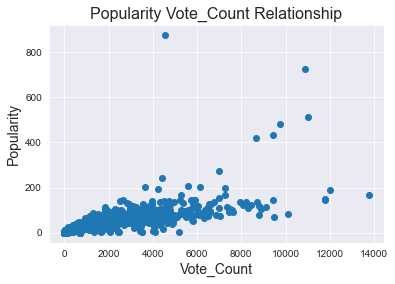

<Figure size 1440x1440 with 0 Axes>

In [52]:
# visualizing the realtionship between popularity and vote_count by scatter plot
plt.scatter(movies_clean.vote_count, movies_clean.popularity)
plt.xlabel('Vote_Count', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.title('Popularity Vote_Count Relationship', fontsize= 16)
plt.figure(figsize=(20, 20))

### Q6: What is the relation between the vote_count and vote rate?

_**visualizing the realtionship between vote rate and vote_count by scatter plot and clarify their effect on each other**_


<Figure size 1440x1440 with 0 Axes>

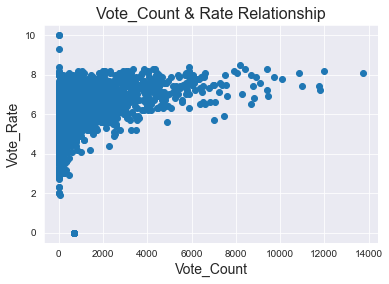

<Figure size 1440x1440 with 0 Axes>

In [53]:
# visualizing the realtionship between vote rate and vote_count by scatter plot
plt.scatter(movies_clean.vote_count, movies_clean.vote_average)
plt.xlabel('Vote_Count', fontsize=14)b
plt.ylabel('Vote_Rate', fontsize=14) 
plt.title('Vote_Count & Rate Relationship', fontsize= 16)
plt.figure(figsize=(20, 20))

### Q7: Is there a relation between the budget and the runtime ?

_**visualizing the realtionship between budget and runtime by scatter plot and if the long runtime increasing the budget or not**_

<Figure size 1440x1440 with 0 Axes>

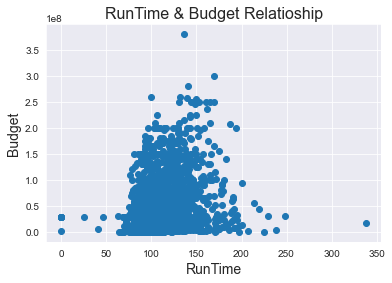

<Figure size 1440x1440 with 0 Axes>

In [54]:
# visualizing the realtionship between budget and runtime by scatter plot
plt.scatter(movies_clean.runtime, movies_clean.budget)
plt.xlabel('RunTime', fontsize=14)
plt.ylabel('Budget', fontsize=14)
plt.title('RunTime & Budget Relatioship', fontsize= 16)
plt.figure(figsize=(20, 20))

### Q8: Is there a relation between the budget and the revenue ?

_**visualizing the realtionship between budget and revenue by scatter plot to clarify if there a relation between budget and revenue**_

<Figure size 1440x1440 with 0 Axes>

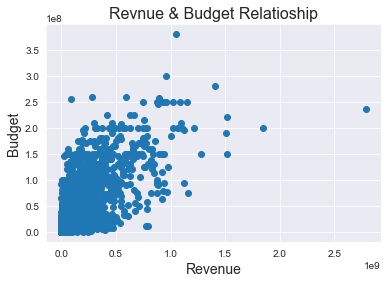

<Figure size 1440x1440 with 0 Axes>

In [55]:
# visualizing the realtionship between budget and revenue by scatter plot
plt.scatter(movies_clean.revenue, movies_clean.budget)
plt.xlabel('Revenue', fontsize=14)
plt.ylabel('Budget', fontsize=14)
plt.title('Revnue & Budget Relatioship', fontsize= 16)
plt.figure(figsize=(20, 20))

### Q9: Most Popular Directors?

_**get the Top 10 Directors over the time and their movie number they directed**_

In [56]:
movies_clean.director.value_counts().nlargest(10)

Steven Spielberg     27
Clint Eastwood       18
Ridley Scott         15
Martin Scorsese      15
Renny Harlin         15
Robert Rodriguez     15
Oliver Stone         14
Tim Burton           14
Steven Soderbergh    14
Barry Levinson       13
Name: director, dtype: int64

### Q10: Average Runtime?

_**in this visulaization we are trying to represent the average runtime of the movies and how much movies have the average runtime over time**_

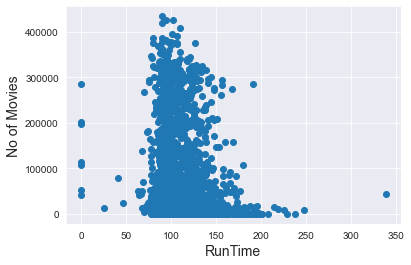

<Figure size 1440x1440 with 0 Axes>

In [57]:
# visualzing the runtime average by scatter plot
# in this visulaization we are trying to represent the average runtime of the movies and how much movies have the average runtime over time
plt.scatter(movies_clean.runtime, movies_clean.movie_id)
plt.xlabel('RunTime', fontsize=14)
plt.ylabel('No of Movies', fontsize=14)
f=plt.figure()
f.set_figwidth(20)
f.set_figheight(20)
plt.show()

In [58]:
plt.show()

In [59]:
movies_clean.to_csv('movies.csv')

<a id='conclusions'></a>
## Conclusions

#### Rate of movie production over years for each movie genre:
> Drama Movies: The highest year of Drama is 2006 <br/>
> Comedy Movies: The highest year of Comedy is 2012 <br/>
> Horror Movies: The highest year of Horror is 2009 <br/>
> Thriller Movies: The highest year of Thriller is 2015 <br/>
> Action Movies: The highest year of Action is 2015 <br/>
> Fantasy Movies: The highest year of Fantasy is 2016 <br/>
> Western Movies: The highest year of Western is 1968, the rate is descending <br/>
> Science Fiction Movies: The highest year of Science Fiction is 2000 <br/>
> Drama Movies: The highest year of Drama is 2006 <br/>
#### The highest profitable, rated, vote_count, popular movie genre:
> The most Profitable movie genres are First: Comedy, Second: Drama, Third: Action <br/>
> The highest rated movie genres are First: Drama, Second: Comedy, Third: Thriller <br/>
> The most vote_count movie genres are First: Action, Second: Drama, Third: Adventure <br/>
> The most Popular movie genres are First: Drama, Second: Action, Third: Thriller <br/>
#### Top 10 Movies?:
>>**TOP 10 highest revenue:** <br/>                   
>>Avatar<br/>
>>Titanic<br/>
>>The Avengers<br/>
>>Jurassic World<br/>
>>Furious 7<br/>
>>Avengers: Age of Ultron<br/>
>>Frozen<br/>
>>Iron Man 3<br/>
>>Minions<br/>
>>Captain America: Civil War <br/><br/>
>> **TOP 10 popular:** <br/>
>>Minions<br/>
>>Interstellar<br/>
>>Deadpool<br/>
>>Guardians of the Galaxy<br/>
>>Mad Max: Fury Road<br/>
>>Jurassic World<br/>
>>Pirates of the Caribbean: The Curse of the Black Pearl<br/>
>>Dawn of the Planet of the Apes<br/>
>>The Hunger Games: Mockingjay - Part 1<br/>
>>Big Hero 6<br/><br/>
>>**TOP 10 rated:** <br/>
>>Dancer, Texas Pop. 81<br/>
>>Me You and Five Bucks<br/>
>>One Man's Hero<br/>
>>The Shawshank Redemption<br/>
>>The Prisoner of Zenda<br/>
>>The Godfather<br/>
>>Fight Club<br/>
>>Schindler's List<br/>
>>Spirited Away<br/>
>>The Godfather: Part II<br/>
#### Companies made the overall highest revenue per year:
<a href="#companies">Companies</a>
#### Relation between popularity and vote_count:
> The Distribution is skewed to left , positive relationship
#### Relation between the vote_count and vote rate:
> No effect of the vote count on the vote rate
#### Relation between the budget and the runtime:
> No effect of the long runtime on increasing the budget
#### Relation between the budget and the revenue:
> The Distribution is skewed to the left , positive relationship
#### Most Popular Directors and Number of their movies in our dataset:
>Steven Spielberg:      27<br/>
>Clint Eastwood:        18<br/>
>Robert Rodriguez:      15<br/>
>Ridley Scott:          15<br/>
>Renny Harlin:          15<br/>
>Martin Scorsese:       15<br/>
>Steven Soderbergh:     14<br/>
>Tim Burton:            14<br/>
>Oliver Stone:          14<br/>
>Woody Allen:           13<br/>
#### Average Runtime:
> between 100:110 mins , meanly about 106 mins

### *Limitations:*
1. We have used TMBD Movies dataset for our analysis and worked with popularity, revenue and runtime. Our analysis is limited to only the provided dataset. For example, the dataset does not confirm that every release of every director is listed.<br/>
2. There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.<br/>
3. Dropping missing or Null values from variables of our interest might skew our analysis and could show unintentional bias towards the relationship being analyzed. etc.<br/>

## Resources:

<a href='https://pandas.pydata.org/docs/'>Pandas Documentation</a><br/>
<a href='https://matplotlib.org/3.3.3/contents.html#'>Matplotlib Documentation</a><br/>
<a href='https://numpy.org/doc/1.20/'>Numpy Documentation</a><br/>
<a href='https://docs.python.org/3/'>Python Documentation</a><br/>
<a href='https://seaborn.pydata.org/'>Seaborn Documentation</a><br/>
<a href='https://www.kaggle.com/tmdb/tmdb-movie-metadata'>Kaggle TMDb dataset</a><br/>
<a href='http://ipython.readthedocs.io/en/stable/interactive/magics.html'>Notebook Inline magics</a><br/>

In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset(TMDb).ipynb'])

1